In [2]:
#imports 
from qutip import *
import matplotlib.pyplot as plt
import numpy as np 
import random as rand

In [3]:
def pauliTWIRLalt(rhoI, unitary, probs, n=0,):
    gates = [] 
    lhsEC = qeye(2) 
    combo_gate = qeye(2)
    for i in range(n): 
        gates += rand.choices(population=[qeye(2), sigmax(), sigmay(), sigmaz()], weights=[probs['Pi'], probs['Px'],probs['Py'],probs['Pz']], k=1)
    
    for g in gates: 
        combo_gate = combo_gate * g
        lhsEC = unitary * g * lhsEC 
    return combo_gate * lhsEC * rhoI * lhsEC.dag() * combo_gate.dag()

pauliTWIRLalt(basis(2,0)*basis(2,0).dag(), (-1j * (0.01) * sigmax()).expm(), probs={'Px' : 0.25, 'Py' : 0.25, 'Pi' : 0.25,'Pz' : 0.25}, n=5000)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.52538724+0.j         0.        +0.49935507j]
 [0.        -0.49935507j 0.47461276+0.j        ]]

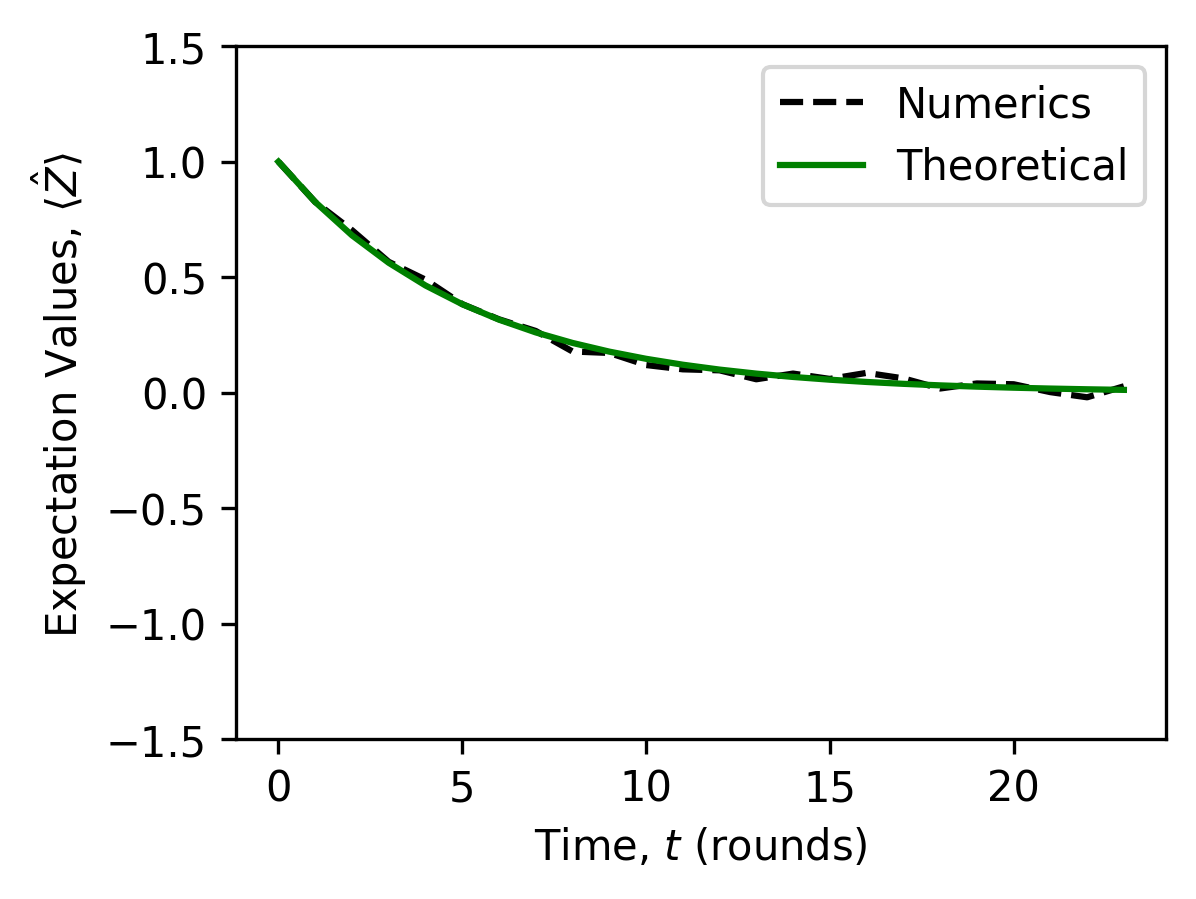

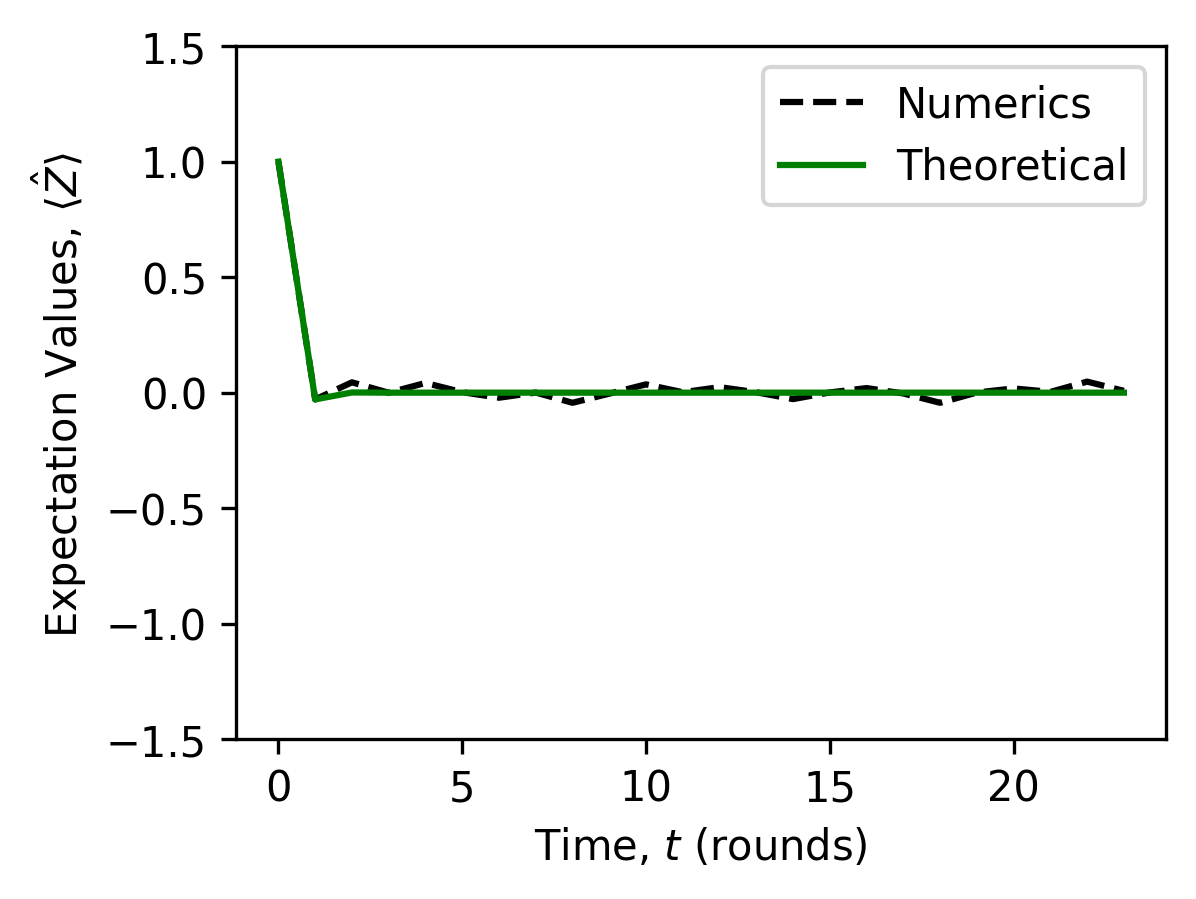

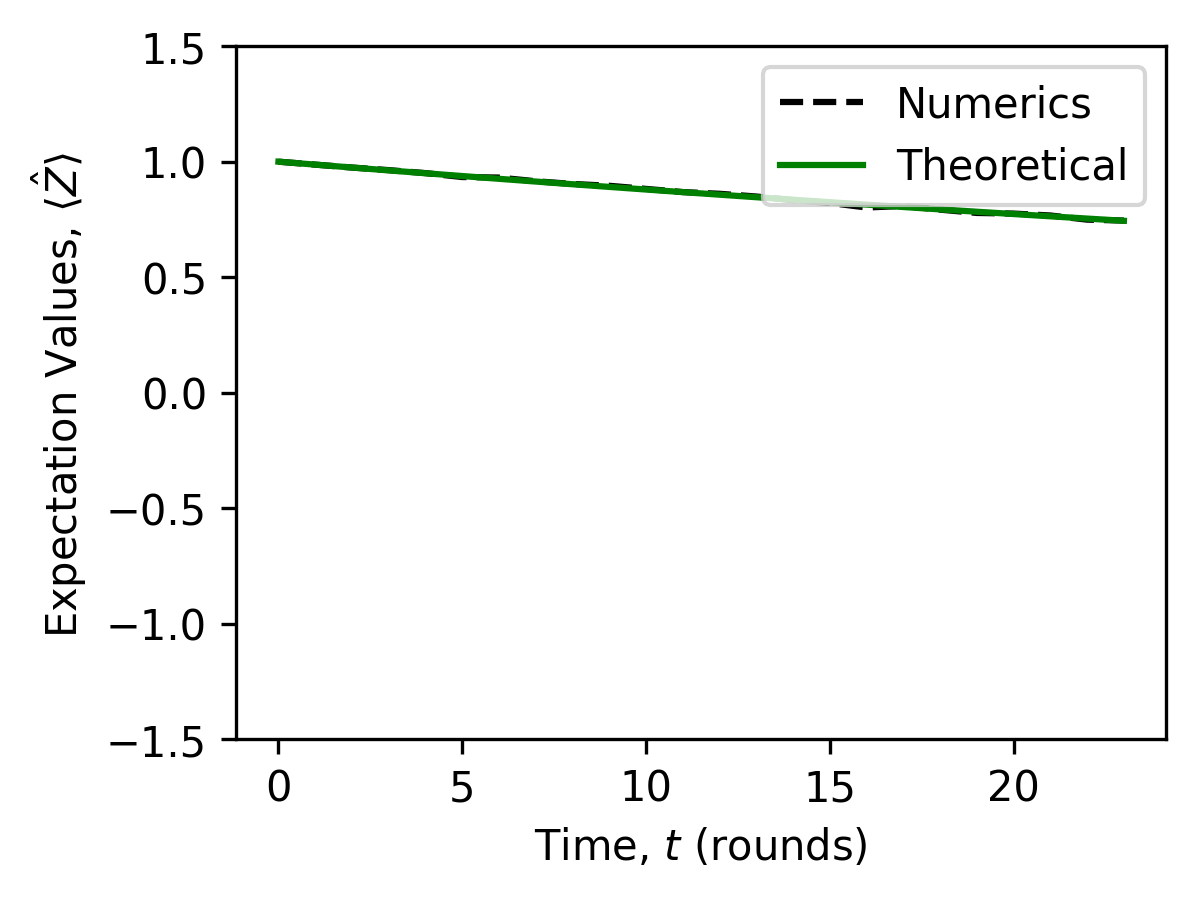

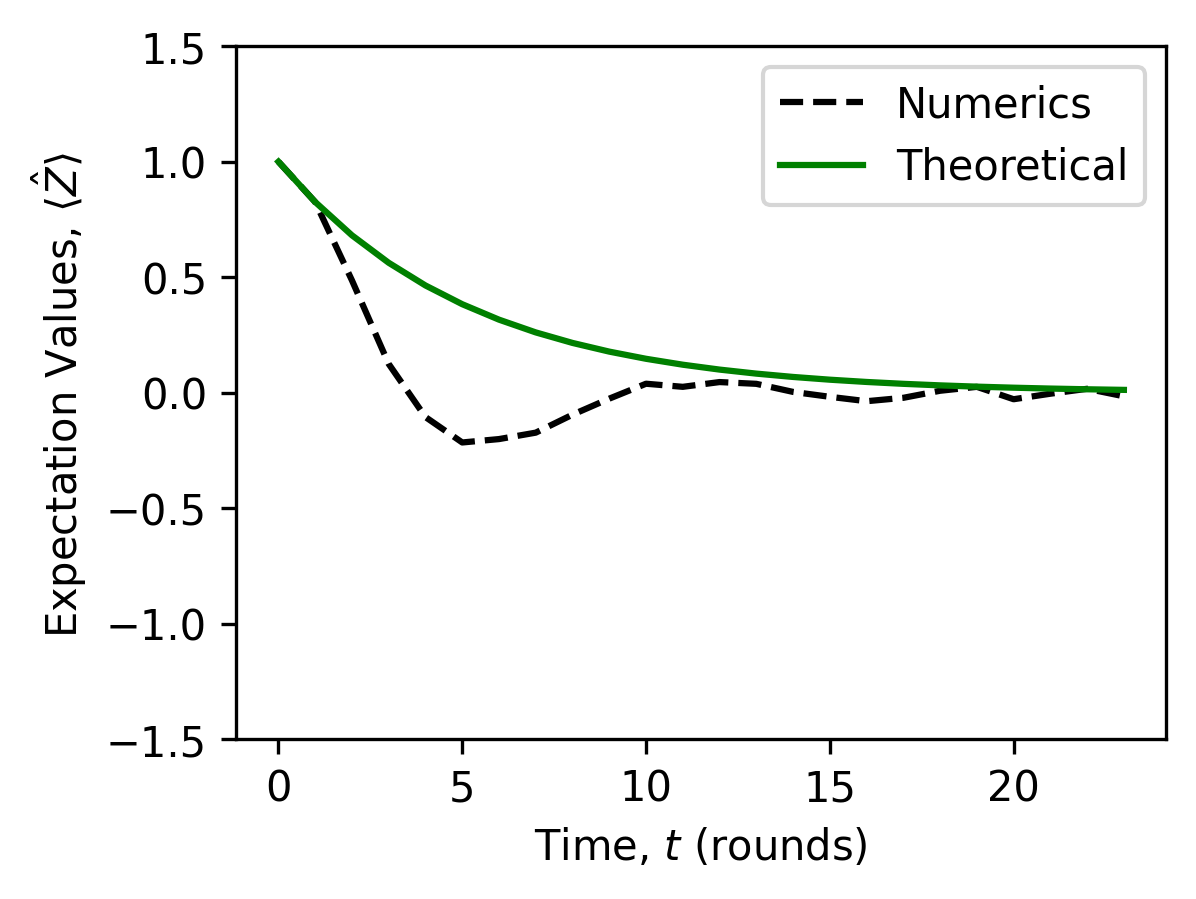

In [27]:
def pauli_twirl_plot(initial, error, probs, t, proj_basis):
      
    fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=300)
    ax.set_ylim(-1.5, 1.5) 
    
    x_axis = np.arange(t)
    theory_y_axis = []
    #mean = []
    #sample_std_list = []
    px = np.abs(0.5 * (sigmax() * error).tr())**2
    
    counter = 1000
   
    match proj_basis: #Based on Projector Basis of Measurement.. 
        case "X": #case x (eigenstates + and -)
            chosen_gate = sigmax()
            #Populate the y axis with expectation values of applied Pauli Error Density Matrix at specific time step
            for time in x_axis:
                theoretical_density = pauliTWIRLalt(initial, error, probs, time)
                while True:
                    expectation_array.append(expect(theoretical_density, chosen_gate))
                    counter += 1 
                    if counter == 1000: 
                        break
                expectation_average_sum = sum(expectation_array) / counter 
                print(f"Expectaion Average Values: {expectation_array}")
                theory_y_axis.append(expect(theoretical_density, chosen_gate) / expectation_average_sum) 

        case "Y":  #case y (eigenstates +i and -i)
            chosen_gate = sigmay()

            for time in x_axis:
                theoretical_density = pauliTWIRLalt(initial, error, probs, time)
                while True:
                    expectation_array.append(expect(theoretical_density, chosen_gate))
                    counter += 1 
                    if counter == 1000: 
                        break
                expectation_average_sum = sum(expectation_array) / counter 
                print(f"Expectaion Average Values: {expectation_array}")
                theory_y_axis.append(expect(theoretical_density, chosen_gate) / expectation_average_sum)   

        case "Z":  #case z (eigenstates 0 and 1 )
            chosen_gate = sigmaz() 
            
            exponetial = (1 - (2 * px))**x_axis                                        
            for time in x_axis:
                
                
                iterator = 0  
                expectation_array = []                                                              
                while iterator < counter: 
                    twirled = pauliTWIRLalt(initial, error, probs, time)
                    expectation_array.append(expect(twirled, chosen_gate))
                    iterator += 1 
                
                expectation_average_sum = sum(expectation_array) 
                
                #print(f"the array{expectation_array}")
                #print(f"Expectaion Average Sum / Counter: {expectation_average_sum / counter}")
                #print(f"Expectaion Value Sum : {expectation_average_sum}")
                #print(f"Y value : {expect(theoretical_density, chosen_gate) / expectation_average_sum }")
                
                
                theory_y_axis.append(expectation_average_sum / counter)
                
    #uncertainty = np.array(sample_std_list)  / np.sqrt(rep)
    
    #print(f"Theoretical Expectation Values = {theory_y_axis}")

    #print(f"Measured Mean = {measured_mean}")
    #print(f"Measured Means = {mean}")
     
    #print(f"Measured Error = {std_error}")
    #print(f"Total Measured Error = {error}")
    ax.plot(x_axis, theory_y_axis, '--k', label='Numerics')
    ax.plot(x_axis, exponetial, color='green', label='Theoretical',)
    
    #print(f"Measured Error = {measured_error}")
    #print(f"Measured Error Array = {error}")
    ax.set_xlabel('Time, $t$ (rounds)') # Description, variable in math form, units
    ax.set_ylabel(f'Expectation Values, $\\langle \\hat {{{proj_basis}}}\\rangle$ ') #(mV)
    
    '''
    ax.errorbar(x_axis, mean, # supply the x and y coordinates
                color='#AA4433',
                yerr= uncertainty, # supply the size of the error bars
                fmt='o', # only draw datapoints using circles, don't connect
                markersize=2.5, # size of the circles
                capsize=2, # size of the caps on the error bars
                label='Measured',
                )
    '''
    ax.legend(loc = "upper right") # create the legend with previously marked information

pauli_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.3) * sigmax()).expm(), probs={'Px' : 0.25,
               'Py' : 0.25,
               'Pi' : 0.25,
               'Pz' : 0.25}, 
               t=24, proj_basis="Z")
pauli_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.8) * sigmax()).expm(), probs={'Px' : 0.25,
               'Py' : 0.25,
               'Pi' : 0.25,
               'Pz' : 0.25}, 
               t=24, proj_basis="Z")
pauli_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.08) * sigmax()).expm(), probs={'Px' : 0.25,
               'Py' : 0.25,
               'Pi' : 0.25,
               'Pz' : 0.25}, 
               t=24, proj_basis="Z")
pauli_twirl_plot(basis(2,0) * basis(2,0).dag(), (-1j * (0.3) * sigmax()).expm(), probs={'Px' : 0.7,
               'Py' : 0.1,
               'Pi' : 0.1,
               'Pz' : 0.1}, 
               t=24, proj_basis="Z")
#i/x/y/z gates are used ot twirl the error at uniform distribution 
#the consequence of twirling is that the coherent error behaves like a pauli error is a rotation of a qubit